<a href="https://colab.research.google.com/github/kussy29/machine_learning/blob/main/Lab06_tree-methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Understanding Splitting Criteria in CART for Regression**
---------------------

In this assignment, you will explore three common formulations of the splitting criterion used in **CART (Classification and Regression Trees)** for **regression problems**:

1. **Local RSS Minimization**  
2. **RSS Gain Maximization**  
3. **Total RSS Minimization**

You will investigate whether any of these criteria are equivalent, and you will design an experiment to determine which criterion is actually employed in a standard implementation such as **scikit-learn’s DecisionTreeRegressor**.



## **The Problem**

Many treatments of CART for regression describe the split selection process in different ways. Below are three frequently cited formulations. Suppose we have a dataset with features $X$ and target $y$, and we seek to choose a feature $X_j$ and a threshold $t$ to split the data into two regions $R_1(X_j, t)$ and $R_2(X_j, t)$. Denote by $\bar{y}_{R_m}$ the mean of targets within region $R_m$.

1. **Local RSS Minimization**  
   We select the feature and threshold that minimize the **sum of squared errors** in the two resulting child nodes:
   $$
   (X_j^*, t^*) = \arg\min_{X_j, t} \sum_{m=1}^{2} \sum_{i : x_i \in R_m(X_j, t)} (y_i - \bar{y}_{R_m})^2.
   $$

2. **RSS Gain Maximization**  

   It is also a local method, looking only at a parent and two child nodes.

   We select the feature and threshold that maximize the **reduction** in RSS, computed by subtracting the RSS of the two child nodes from the RSS in the parent node:
   $$
   (X_j^*, t^*) = \arg\max_{X_j, t} \Bigl\{
   \underbrace{\sum_{i : x_i \in \text{Parent}} (y_i - \bar{y})^2}_{\text{Parent RSS}}
   \;-\;
   \underbrace{\sum_{m=1}^{2} \sum_{i : x_i \in R_m(X_j, t)} (y_i - \bar{y}_{R_m})^2}_{\text{Children RSS}}
   \Bigr\}.
   $$

3. **Total RSS Minimization**  
   For a dataset $\{(x_i, y_i)\}_{i=1}^N$ with features $X$ and target $y$, let $T$ be the current tree.

   For any split on feature $X_j$ at threshold $t$, define $T(X_j, t)$ as the new tree obtained by splitting one leaf of $T$ into two leaves $R_1(X_j, t)$ and $R_2(X_j, t)$.
   
   Let $\mathrm{Leaves}(T(X_j, t))$ be the set of all leaf indices in this new tree. For each leaf $m \in \mathrm{Leaves}(T(X_j, t))$, define:
   $$
   R_m = \{\, i \,\mid\, x_i \text{ ends in leaf } m\}.
   $$

   $R_m$ set collects all data indices $i$ whose feature vector $x_i$ is classified into the leaf node $m$ when passed through the tree $T(X_j,t)$. In other words, each leaf node $m$ in $T(X_j, t)$ corresponds to a unique path of splits, and any data point $x_i$ that follows that path is assigned to the leaf $m$; hence, it belongs to $R_m$.

   $R_m$ sets for all leafs $m \in \mathrm{Leaves}(T(X_j, t))$ define a partition of all indices.

   Then the objective of **minimizing total Residual Sum of Squares (total RSS)** is stated as:
   $$
   (X_j^*, t^*) = \arg\min_{(X_j, t)} \sum_{m \in \mathrm{Leaves}(T(X_j, t))}
   \sum_{i \in R_m} \Bigl(y_i - \overline{y}_{R_m}\Bigr)^2,
   $$
   where
   $$
   \overline{y}_{R_m} = \frac{1}{\lvert R_m \rvert}
   \sum_{i \in R_m} y_i
   $$
   is the mean response in leaf $m$.


## **Research Questions**

1. **Equivalence Analysis**  
   Determine whether the above formulations are equivalent or if they can yield different split choices. Specifically:
   - Are *local RSS minimization* and *RSS gain maximization* equivalent?
   - Does *total RSS minimization* coincide with either of these two, or is it distinct?
   
2. **Empirical Experiment**  
   Design and conduct a Python experiment to determine which of these formulations is implemented in `scikit-learn` in `DecisionTreeRegressor`. Present numerical results and plots to support your conclusion.


## **Tasks & Deliverables**

1. **Formulation Analysis**  
   - Compare *local RSS minimization*, *RSS gain maximization*, and *total RSS minimization*.
   - If you find that any pair of formulations is equivalent, provide a concise proof.  
   - If you find that they differ, construct a counterexample.

2. **Empirical Verification**  
   - Create a small artificial dataset and train a `DecisionTreeRegressor` from `scikit-learn`.
   - The dataset must be designed in a way that uniquely identifies the formulation used. Provide a short code snippet and a plot or table to support your conclusion.

3. **Report**  
   - Summarize your theoretical insights and empirical findings in a **Colab notebook**.
   - Include the relevant proofs, code, discussion, and conclusions.
   - Place the notebook in your **GitHub repository** for this course, add a link to it in your README.md and add an **“Open in Colab”** badge in the notebook so it can be launched directly.



1. local RSS minimization and RSS gain maximization are equvalent
   $$
   \max_{X_j, t} \Bigl [
    \sum_{i : x_i \in \text{Parent}} (y_i - \bar{y})^2-
   \sum_{m=1}^{2} \sum_{i : x_i \in R_m(X_j, t)} (y_i - \bar{y}_{R_m})^2
   \Bigr ]=\max_{X_j, t} - \sum_{m=1}^{2} \sum_{i : x_i \in R_m(X_j, t)} (y_i - \bar{y}_{R_m})^2= $$
   $$
   =\min_{X_j,t} \sum_{m=1}^{2} \sum_{i : x_i \in R_m(X_j, t)} (y_i - \bar{y}_{R_m})^2
   $$
   First equality is because first component it's constant in terms of $X_j,t$.

   2. To answer this question I created the dataset X which have one point equal to 100 and 9 points sampled from $\mathcal{N}(0,1)$. And
   $y=2X^3+ɛ$, where $ɛ\sim \mathcal{N}(0,1)$.

   We are going to create one tree with depth of 2

In [ ]:
import numpy as np


# Stworzyć 1 wymiarowe dane i 1 wymiarowy target
np.random.seed(42)
X = np.random.rand(9)
X = np.concatenate([X,np.array([100])])
X = np.sort(X)
y = 2 * X**3  + np.random.randn(10)

def compute_ssr(y):
    if len(y) == 0:
        return 0
    mean_y = np.mean(y)
    return np.sum((y - mean_y) ** 2)


Local RSS minimazation

In [ ]:
best_ssr = [float('inf'),float('inf'),float('inf')]
best_split = {'1':None, '2':None,'3':None}
ssr_list = []

# Znaleźć optymalny podział dla minimalizacji lokalnego RSS dla drzewa o głębokości 2

for i_1 in range(1,len(X)):
  threshold_1 = (X[i_1 - 1] + X[i_1]) / 2
  mask_1 = (X < threshold_1)
  mask_2 = (X >= threshold_1)

  ssr_1 = compute_ssr(y[mask_1])
  ssr_2 = compute_ssr(y[mask_2])

  total_ssr = ssr_1 + ssr_2
  if total_ssr < best_ssr[0]:
      best_ssr[0] = total_ssr
      best_split['2'] = threshold_1


for i_21 in range(1, i_1):
    threshold_21 = (X[i_21 - 1] + X[i_21]) / 2
    mask_1 = (X < threshold_21)
    mask_2 = (X >= threshold_21) & (X < threshold_1)
    ssr_1 = compute_ssr(y[mask_1])
    ssr_2 = compute_ssr(y[mask_2])

    total_ssr = ssr_1 + ssr_2
    if total_ssr < best_ssr[1]:
        best_ssr[1] = total_ssr
        best_split['1'] = threshold_21

for i_22 in range(i_1+1, len(X)):
    threshold_22 = (X[i_22 - 1] + X[i_22]) / 2
    mask_1 = (X >= threshold_22)
    mask_2 = (X >= threshold_1) & (X < threshold_22)
    ssr_1 = compute_ssr(y[mask_1])
    ssr_2 = compute_ssr(y[mask_2])

    total_ssr = ssr_1 + ssr_2
    if total_ssr < best_ssr[2]:
        best_ssr[2] = total_ssr
        best_split['3'] = threshold_21

if best_split['1'] is None:
    best_ssr[1]=0

if best_split['3'] is None:
    best_ssr[2]=0



print("Best split:", best_split)
print("Best SSR:", best_ssr)
print("Best sum of SSR", best_ssr[1]+best_ssr[2])

Best split: {'1': np.float64(0.5998867479701226), '2': np.float64(50.47535715320496), '3': None}
Best SSR: [np.float64(12.515477520930956), np.float64(4.101184798272958), 0]
Best sum of SSR 4.101184798272958


Global RSS minimazation

In [ ]:
best_ssr = float('inf')
best_split = None
ssr_list = []

# Znaleźć optymalny podział dla minimalizacji globalnego RSS dla drzewa o głębokości 3

for i_1 in range(2,len(X)-1):
  threshold_1 = (X[i_1 - 1] + X[i_1]) / 2
  for i_21 in range(1, i_1):
    threshold_21 = (X[i_21 - 1] + X[i_21]) / 2
    for i_22 in range(i_1+1, len(X)):
      threshold_22 = (X[i_22 - 1] + X[i_22]) / 2

      mask_1 = (X < threshold_21)
      mask_2 = (X < threshold_1) & (X >= threshold_21)
      mask_3 = (X < threshold_22) & (X >= threshold_1)
      mask_4 = (X >= threshold_22)

      ssr_1 = compute_ssr(y[mask_1])
      ssr_2 = compute_ssr(y[mask_2])
      ssr_3 = compute_ssr(y[mask_3])
      ssr_4 = compute_ssr(y[mask_4])

      total_ssr = ssr_1 + ssr_2 + ssr_3 + ssr_4

      if total_ssr < best_ssr:
          best_ssr = total_ssr
          best_split = {'1':threshold_21,'2':threshold_1,'3':threshold_22}


print("Best split:", best_split)
print("Best SSR:", best_ssr)

Best split: {'1': np.float64(0.48659930152219955), '2': np.float64(0.5998867479701226), '3': np.float64(50.47535715320496)}
Best SSR: 2.1462402448229665


As we can see in local RSS minimaztion parent exclude one outlier and then one of the child classifies another 9 points.
And in Total RSS minimazation parent ('2' in best split) is involved in spliting 9 points and second child of a parent splits one outlier.

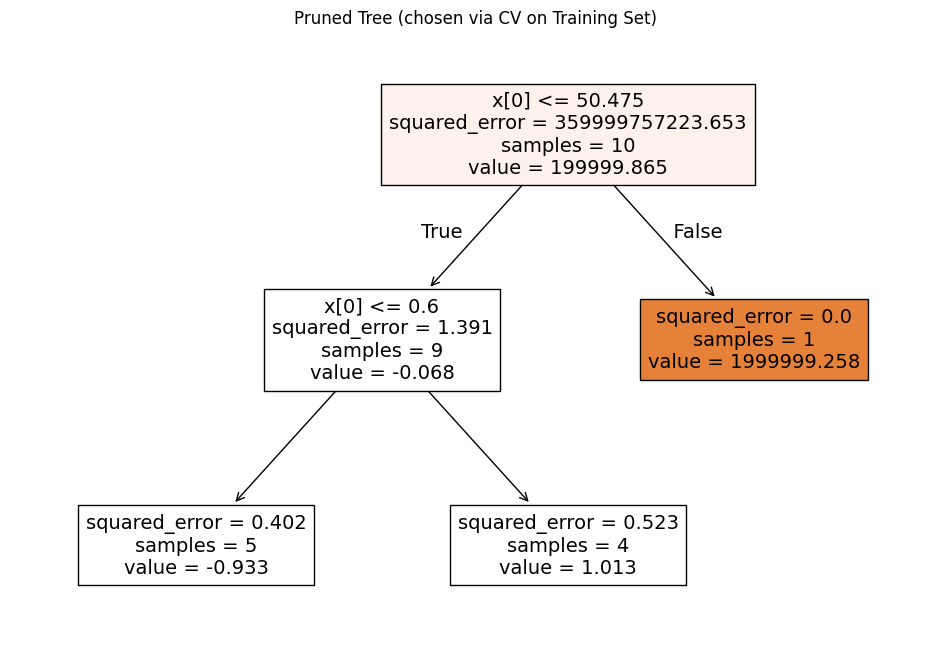

In [ ]:

from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
regressor = DecisionTreeRegressor(random_state=0,max_depth=2)
regressor.fit(X.reshape(-1, 1), y)

from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(
    regressor,
    filled=True
)
plt.title("Pruned Tree (chosen via CV on Training Set)")
plt.show()

As we can see DecisionTreeRegressor behaves like the local RSS minimizer which we have before. It creates parent that excludes the outlier and one child with threshold at the level 0.6. We can see different squared error, but it's because DecisionTreeRegressor displayed not the sum, but the mean of errors.

The reason why local aproach is used it's because it's less expensive (increase in max_depth is additive not multiplicative like in global approach) and generates less overfitting to training data.